

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The second project :
In this project I will analyze the IMDB database.

In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

Load the data from dataset

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_tm = pd.read_csv('tmdb-movies.csv')


In [4]:
#show columns information 
df_tm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#show 3 first rows 

df_tm.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [6]:
#show 3 last rows 

df_tm.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [7]:
# show some statistical 
df_tm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


###  Data Cleaning
#### -remove some columns that will not used 
#### -remove the rows have null values
#### -remove duplicated rows
#### -convert any data type isn't true



In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#remove some columns that will not used 

#homepage

df_tm.drop('homepage', axis=1, inplace=True)

#overview
df_tm.drop('overview', axis=1, inplace=True)

#tagline
df_tm.drop('tagline', axis=1, inplace=True)

#production_companies
df_tm.drop('production_companies', axis=1, inplace=True)

#cast
df_tm.drop('cast', axis=1, inplace=True)

#keywords
df_tm.drop('keywords', axis=1, inplace=True)

#genres
df_tm.drop('genres', axis=1, inplace=True)

df_tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [9]:
#show how many of null rows 
df_tm.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [10]:
#remove the rows have null values
df_tm.dropna(inplace=True)
df_tm.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [11]:
#show how many of duplicated rows
df_tm.duplicated().sum()

1

In [12]:
#remove duplicated row
df_tm.duplicated()
sum(df_tm.duplicated())
df_tm.drop_duplicates(inplace=True)
df_tm.duplicated().sum()

0

In [13]:
#convert any data type isn't true 
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10815 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10815 non-null  int64  
 1   imdb_id         10815 non-null  object 
 2   popularity      10815 non-null  float64
 3   budget          10815 non-null  int64  
 4   revenue         10815 non-null  int64  
 5   original_title  10815 non-null  object 
 6   director        10815 non-null  object 
 7   runtime         10815 non-null  int64  
 8   release_date    10815 non-null  object 
 9   vote_count      10815 non-null  int64  
 10  vote_average    10815 non-null  float64
 11  release_year    10815 non-null  int64  
 12  budget_adj      10815 non-null  float64
 13  revenue_adj     10815 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [14]:
# convert "release_date" type from "object" to "date time"
df_tm.release_date = pd.to_datetime(df_tm.release_date)
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10815 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10815 non-null  int64         
 1   imdb_id         10815 non-null  object        
 2   popularity      10815 non-null  float64       
 3   budget          10815 non-null  int64         
 4   revenue         10815 non-null  int64         
 5   original_title  10815 non-null  object        
 6   director        10815 non-null  object        
 7   runtime         10815 non-null  int64         
 8   release_date    10815 non-null  datetime64[ns]
 9   vote_count      10815 non-null  int64         
 10  vote_average    10815 non-null  float64       
 11  release_year    10815 non-null  int64         
 12  budget_adj      10815 non-null  float64       
 13  revenue_adj     10815 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)


In [15]:
# Now check for all results of  cleaning procces
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10815 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10815 non-null  int64         
 1   imdb_id         10815 non-null  object        
 2   popularity      10815 non-null  float64       
 3   budget          10815 non-null  int64         
 4   revenue         10815 non-null  int64         
 5   original_title  10815 non-null  object        
 6   director        10815 non-null  object        
 7   runtime         10815 non-null  int64         
 8   release_date    10815 non-null  datetime64[ns]
 9   vote_count      10815 non-null  int64         
 10  vote_average    10815 non-null  float64       
 11  release_year    10815 non-null  int64         
 12  budget_adj      10815 non-null  float64       
 13  revenue_adj     10815 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)


In [16]:
df_tm.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
df_tm.shape

(10815, 14)

<a id='eda'></a>
## Exploratory Data Analysis

#### I will answer 5 analytical questions :


### Research Question 1 (which year have the highest numbers of movies and lowest numbers of movies ?!)

In [18]:


#highest_year
high_year=df_tm.groupby("release_year")['release_year'].count().sort_values(ascending=False).head(3)
high_year

release_year
2014    694
2013    654
2015    626
Name: release_year, dtype: int64

Text(0, 0.5, 'Movies')

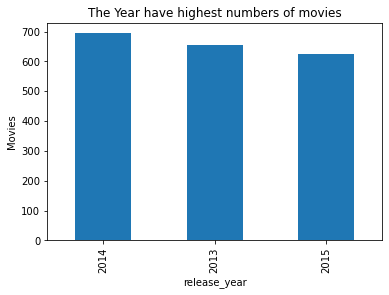

In [19]:
high_year_plot=high_year.plot(kind="bar",title="The Year have highest numbers of movies",figsize=(6,4));
plt.xlabel("release_year")
plt.ylabel("Movies")

#### * The Year have highest numbers of movies is 2014 .

In [20]:
#LOWEST_YEAR
low_year=df_tm.groupby("release_year")['release_year'].count().sort_values(ascending=True).head(3)
low_year

release_year
1961    31
1969    31
1960    32
Name: release_year, dtype: int64

Text(0, 0.5, 'Movies')

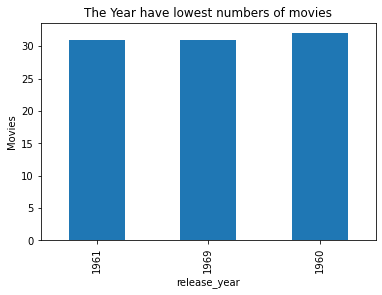

In [21]:
low_year_plot=low_year.plot(kind="bar",title="The Year have lowest numbers of movies",figsize=(6,4));
plt.xlabel("release_year")
plt.ylabel("Movies")

#### * The Years have lowest numbers of movies are 1961 & 1969 .

### Research Question 2 (who is the director who saved on the budget & how much he saved AND who is the director who lost on the budget & how much he lose?!)

#### - Before exploring the data for this question , I want to replace the zero values on "revenue" and "budget" columns to "mean" function of it  :

In [22]:
#find the zero values on revenue and budget columns 
print("budget:",df_tm[(df_tm['budget']==0)].shape[0])
print("revenue:",df_tm[(df_tm['revenue']==0)].shape[0])

budget: 5651
revenue: 5967


In [23]:
#replace the zero values on "revenue" and "budget" columns to function "mean" of it
df_tm['budget']=df_tm['budget'].replace(0,df_tm['budget'].mean())
df_tm['revenue']=df_tm['revenue'].replace(0,df_tm['revenue'].mean())
print("budget:",df_tm[(df_tm['budget']==0)].shape[0])
print("revenue:",df_tm[(df_tm['revenue']==0)].shape[0])

budget: 0
revenue: 0


In [24]:
#calculate the saved on budget
#savedbudget= budget-revenue

df_tm['saved_budget']=df_tm['revenue']-df_tm['budget']

In [25]:
df_tm.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,saved_budget
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


In [26]:
#the maximum of saved_budget
df_saved_budget_max= df_tm.groupby("director")["saved_budget"].max().sort_values(ascending=False).head(5)
df_saved_budget_max

director
James Cameron      2.544506e+09
J.J. Abrams        1.868178e+09
Colin Trevorrow    1.363529e+09
James Wan          1.316249e+09
Joss Whedon        1.299558e+09
Name: saved_budget, dtype: float64

Text(0, 0.5, 'saved_budget')

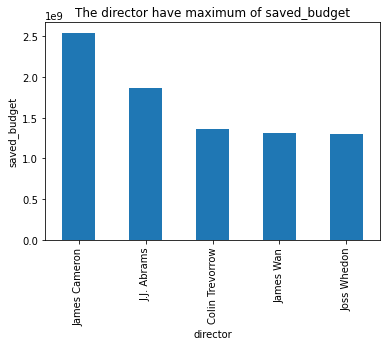

In [27]:
max_saved_budget_plot=df_saved_budget_max.plot(kind="bar",title="The director have maximum of saved_budget",figsize=(6,4));
plt.xlabel("director")
plt.ylabel("saved_budget")

#### * The director have maximum of saved_budget is "James Cameron" .

In [28]:
#the minimum of saved_budget
df_saved_budget_min= df_tm.groupby("director")["saved_budget"].min().sort_values(ascending=True).head(5)
df_saved_budget_min

director
Sngmoo Lee         -4.139124e+08
Gore Verbinski     -1.657101e+08
John Lee Hancock   -1.191800e+08
Simon Wells        -1.110072e+08
Joe Johnston       -1.099900e+08
Name: saved_budget, dtype: float64

Text(0, 0.5, 'saved_budget')

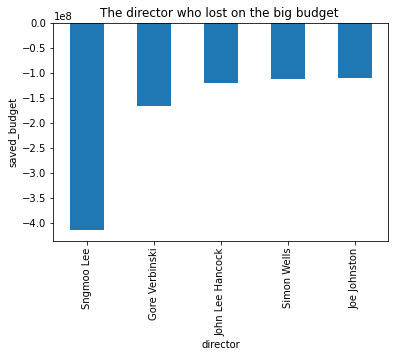

In [29]:
max_saved_budget_plot=df_saved_budget_min.plot(kind="bar",title="The director who lost on the big budget ",figsize=(6,4));
plt.xlabel("director")
plt.ylabel("saved_budget")

#### * The director have minimum of saved_budget is "Sngmoo Lee " .

### Research Question 3 ( Who is the director who has produced the most & less  movies and how many movies has he produced?! )

In [30]:
# The director who has produced the most movies 
most_director=df_tm.groupby("director")['director'].count().sort_values(ascending=False).head(5)
most_director

director
Woody Allen         45
Clint Eastwood      34
Martin Scorsese     29
Steven Spielberg    29
Ridley Scott        23
Name: director, dtype: int64

Text(0, 0.5, 'produced movies')

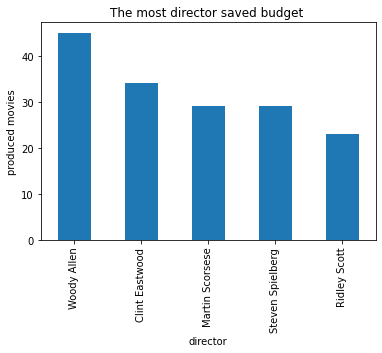

In [31]:
most_director_plot=most_director.plot(kind="bar",title="The most director saved budget ",figsize=(6,4));
plt.xlabel("director")
plt.ylabel("produced movies")

#### * The most director saved budget is " Woody Allen".

In [34]:
# The director who has produced the less movies 

most_director=df_tm.groupby("director")['director'].count().sort_values(ascending=True).head(3215)
most_director

director
 FrÃ©dÃ©ric Jardin                           1
Liev Schreiber                               1
Lili Fini Zanuck                             1
Lilly Wachowski|Lana Wachowski|Tom Tykwer    1
Lina WertmÃ¼ller                             1
                                            ..
Antoine de Caunes                            1
Alan White                                   1
Fred Olen Ray                                1
Antoine Thomas                               1
Vincent Garenq                               2
Name: director, Length: 3215, dtype: int64

#### * There are 3214 directors who have produced just one movie each in thier career .

### Research Question 4 (what correlation between vote average & vote count  ?!)

<Figure size 432x288 with 0 Axes>

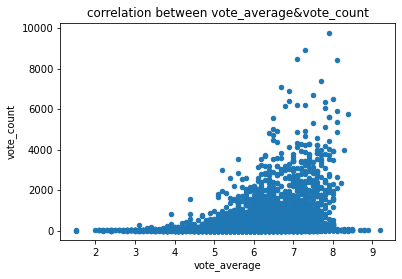

In [35]:


plt.figure()
vote_po_plt = df_tm.plot(x="vote_average", y="vote_count", title="correlation between vote_average&vote_count", kind="scatter");

plt.xlabel("vote_average")
plt.ylabel("vote_count")

plt.show()

#### * There is correlation between vote average and votes count , when move average is high the votes count it will be high also .

### Research Question 5 (  How much the difference between budget & revneue & saved_budget on the 2010 year and all the years  ?!)

In [36]:
#the difference between (budget) on the 2010 year and all the years
df_year=df_tm.groupby("release_year").sum()
df_year.head(5)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,saved_budget
release_year,,,,,,,,,,
1960,502889,14.685834,3.599438e+08,1.145255e+09,3541,2481,202.4,1.626252e+08,1.069117e+09,7.853113e+08
1961,578367,13.107641,3.105702e+08,1.177930e+09,3702,2405,197.6,3.365630e+08,2.463622e+09,8.673601e+08
1962,544034,14.553069,3.191553e+08,1.135810e+09,3979,2392,203.0,3.944616e+08,1.553996e+09,8.166547e+08
1963,562904,17.092019,4.112184e+08,1.267675e+09,3785,2816,215.2,5.221334e+08,1.334357e+09,8.564568e+08
1964,729942,17.321989,4.948959e+08,1.701322e+09,4587,3137,260.9,2.775772e+08,2.397193e+09,1.206426e+09


Text(0, 0.5, 'budget')

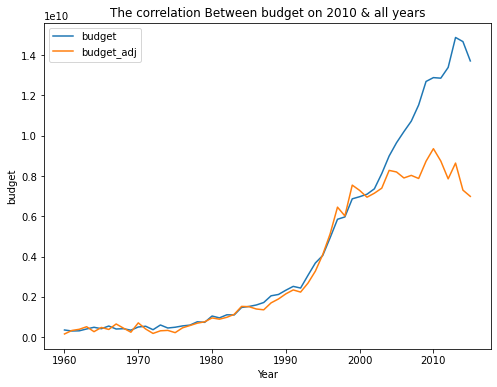

In [37]:

df_year.plot( y=['budget','budget_adj'],title="The correlation Between budget on 2010 & all years",figsize=(8,6));

plt.xlabel("Year")
plt.ylabel("budget")

Text(0, 0.5, 'revenue')

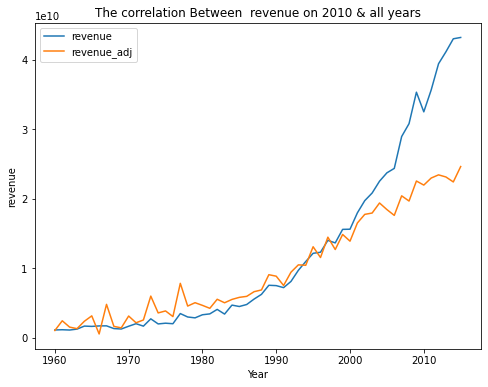

In [38]:
#the difference between (revenue) on the 2010 year and all the years

df_year.plot( y=['revenue','revenue_adj'],title="The correlation Between  revenue on 2010 & all years",figsize=(8,6));

plt.xlabel("Year")
plt.ylabel("revenue")

In [39]:

#the difference between (saved_budget) on the 2010 year and all the years
#saved_budget(for all years)
#saved_budget_adj(for 2010)

df_tm['saved_budget_adj']=df_tm['revenue_adj']-df_tm['budget_adj']
df_tm.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,saved_budget,saved_budget_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,1.704191e+08


In [40]:
df_year=df_tm.groupby("release_year").sum()
df_year.head(5)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,saved_budget,saved_budget_adj
release_year,,,,,,,,,,,
1960,502889,14.685834,3.599438e+08,1.145255e+09,3541,2481,202.4,1.626252e+08,1.069117e+09,7.853113e+08,9.064920e+08
1961,578367,13.107641,3.105702e+08,1.177930e+09,3702,2405,197.6,3.365630e+08,2.463622e+09,8.673601e+08,2.127059e+09
1962,544034,14.553069,3.191553e+08,1.135810e+09,3979,2392,203.0,3.944616e+08,1.553996e+09,8.166547e+08,1.159535e+09
1963,562904,17.092019,4.112184e+08,1.267675e+09,3785,2816,215.2,5.221334e+08,1.334357e+09,8.564568e+08,8.122237e+08
1964,729942,17.321989,4.948959e+08,1.701322e+09,4587,3137,260.9,2.775772e+08,2.397193e+09,1.206426e+09,2.119616e+09


Text(0, 0.5, 'saved budget')

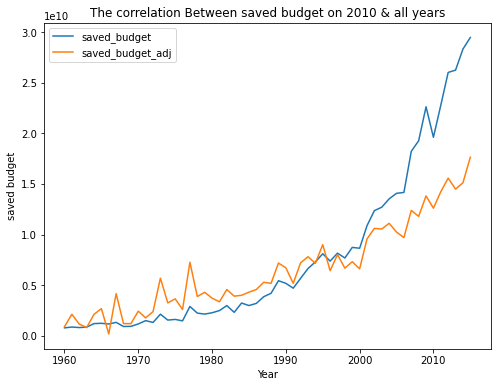

In [41]:

df_year.plot( y=['saved_budget','saved_budget_adj'],title="The correlation Between saved budget on 2010 & all years",figsize=(8,6));

plt.xlabel("Year")
plt.ylabel("saved budget")

#### * The budget of all years has witnessed anoticable increase in last 20 years , and in contrast to the 2010 year budget which reached a certain height and remained somewhat stable

#### * The revenue of all years have increase  big numbers , and the revenue of 2010 have increase numbers but not like revenue of all years it was the biggest .

#### * There is little difference between saved_budget on the 2010 year and all the years .

### Research Question 6 (Which movie have the highest of runtime and which is the lowest  ?!)

In [42]:
#use function calculate the maximum and minimum 

def df_maxmin(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    max_index = df_tm[x].idxmax()
    min_index = df_tm[x].idxmin()
    maxi = pd.DataFrame(df_tm.loc[max_index,:])
    mini = pd.DataFrame(df_tm.loc[min_index,:])
    return pd.concat([maxi,mini],axis = 1)


In [43]:
#calculate the maximum value of (runtime)

df_maxmin('runtime')


,3894,92
id,125336,370687
imdb_id,tt2044056,tt3608646
popularity,0.006925,1.876037
budget,14690733.94258,14690733.94258
revenue,40010007.015719,40010007.015719
original_title,The Story of Film: An Odyssey,Mythica: The Necromancer
director,Mark Cousins,A. Todd Smith
runtime,900,0
release_date,2011-09-03 00:00:00,2015-12-19 00:00:00
vote_count,14,11


#### *When we see the columns above :
 1- first column about the movie have  highest runtime is "The Story of Film: An Odyssey" .
 
 2- second column about the movie have  lowest runtime is "Fresh Guacamole" .

<a id='conclusions'></a>
## Conclusions

1- 2014 is the year in which films were produced with 694 films and the years 1966 and 1969 were the lowest years of film production with 31 films.

2- The director who saved the big budget (James Cameron) and he saved about ( 2.544506e+09) ,and 
   The director who lost the big budget ( Sngmoo Lee ) and he lose about (-4.139124e+08) .

3- The director who has produced the most movies is (Woody Allen ) the number of them ( 45 ) movies , and
   There are 3214 directors who have produced just one movie each in thier career which is the less counts of movies      produced .

4- The movies with the most votes average get the most votes counts . 

5-  The correlation saved budget & budget & revenue between  2010 & all years is similar,as it increases with the passage of years, but it increases more in all years other than 2010 .

6- The movie have highest runtime is "The Story of Film: An Odyssey" it's run about (900 minutes) ,
and the movie have lowest runtime is "Fresh Guacamole" it's run in just (2) minutes !

## Limitations
1- This dataset not fresh update ; so the analysis can be not true 100% .

2- During the data cleaning process ; i replace the zero values on "revenue" and "budget" columns to "mean" function of it .

3- To answer question 6 ; i created  the function (df_maxmin) to calculated the valuse by easy way .